In [1]:
# Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Getting and cleaning the data

In [2]:
#reading the csv file
df_raw=pd.read_csv("loan.csv")
df_raw.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#shape data of the dataset
print(df_raw.shape)
print(df_raw.info())

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [4]:
#Checking Column-wise percentage of null values
round(100*(df_raw.isnull().sum()/len(df_raw.index)), 2) 

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [5]:
# Dropping columns with all NA values
df_raw.dropna(axis=1,how='all',inplace=True) 

In [6]:
#storing number of unique value in a variable
df_new = df_raw.nunique()

In [7]:
#delete the columns in the dataset with only one unique value
for key, value in df_new.items():
    if(value==1):
        df_raw.drop(key,axis=1,inplace=True)

In [8]:
#with the above action, checking on the shape of the dataset
print(df_raw.shape)
print(df_raw.columns)

(39717, 48)
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')


In [9]:
#Column-wise % of missing values
round(100*(df_raw.isnull().sum()/len(df_raw.index)))

id                          0.0
member_id                   0.0
loan_amnt                   0.0
funded_amnt                 0.0
funded_amnt_inv             0.0
term                        0.0
int_rate                    0.0
installment                 0.0
grade                       0.0
sub_grade                   0.0
emp_title                   6.0
emp_length                  3.0
home_ownership              0.0
annual_inc                  0.0
verification_status         0.0
issue_d                     0.0
loan_status                 0.0
url                         0.0
desc                       33.0
purpose                     0.0
title                       0.0
zip_code                    0.0
addr_state                  0.0
dti                         0.0
delinq_2yrs                 0.0
earliest_cr_line            0.0
inq_last_6mths              0.0
mths_since_last_delinq     65.0
mths_since_last_record     93.0
open_acc                    0.0
pub_rec                     0.0
revol_ba

In [10]:
#droping columns that have large number of NaN
df_raw.drop(['mths_since_last_record','next_pymnt_d','desc','mths_since_last_delinq','next_pymnt_d'], axis=1, inplace=True)
print(df_raw.shape)

(39717, 44)


In [11]:
print(df_raw.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')


In [12]:
#droping columns that are not relevant for analysis
df_raw.drop(['emp_title','url','zip_code','member_id'], axis=1, inplace=True)
print(df_raw.shape)

(39717, 40)


In [13]:
df_raw= df_raw.loc[:, (df_raw != 0).any(axis=0)]

In [14]:
# removing all rows that have NaN values
df_raw = df_raw.dropna()

#Column-wise % of missing values
round((100*(df_raw.isnull().sum())/len(df_raw.index)),2)

id                         0.0
loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
purpose                    0.0
title                      0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
out_prncp                  0.0
out_prncp_inv              0.0
total_pymnt                0.0
total_pymnt_inv            0.0
total_rec_prncp            0.0
total_re

In [15]:
df_raw.shape

(37825, 40)

<b>As our aim is to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default, we would focus more on variables available to company before giving loan to applicant.<b>

In [16]:
df_raw.to_csv('PythonExportMain.csv', sep=',') #Exporting the dataframe for parallel analysis on Tableau

# Some general analysis to get an overview of trends wrt different variables

In [17]:
# Converting the column into desirred datatype to compare correlation
df_raw['int_rate'] = df_raw['int_rate'].map(lambda x: x.rstrip('%'))
df_raw['int_rate']=pd.to_numeric(df_raw['int_rate'])


In [18]:
# Same
df_raw['term'] = df_raw['term'].map(lambda x: x.rstrip(' months'))
df_raw['term']=pd.to_numeric(df_raw['term'])

In [19]:
pairplot_data=df_raw[['loan_amnt','int_rate','annual_inc','dti','open_acc','delinq_2yrs','term']]

In [20]:
pairplot_data.head()

,loan_amnt,int_rate,annual_inc,dti,open_acc,delinq_2yrs,term
0,5000,10.65,24000.0,27.65,3,0,36
1,2500,15.27,30000.0,1.00,3,0,60
2,2400,15.96,12252.0,8.72,2,0,36
3,10000,13.49,49200.0,20.00,10,0,36
4,3000,12.69,80000.0,17.94,15,0,60


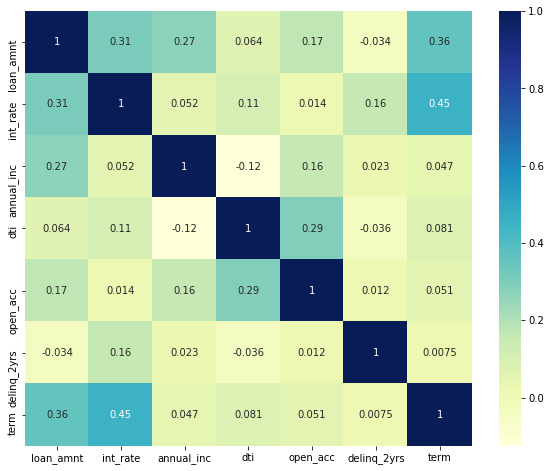

In [21]:
# Comparing the correlation between various numerical attributes using heatmap for self reference 
cor=pairplot_data.corr()
round(cor,3)
plt.figure(figsize=(10,8))
sns.heatmap(cor, cmap="YlGnBu", annot=True)

#### Interest Rate and Term are the most correlated pairs.Annual Income and DTI are least correlated 

In [22]:
# Calculating the percentages of various applications
(df_raw.purpose.value_counts()*100)/len(df_raw.index)


debt_consolidation    47.349636
credit_card           12.946464
other                  9.797753
home_improvement       7.468605
major_purchase         5.509584
small_business         4.547257
car                    3.907469
wedding                2.400529
medical                1.736946
moving                 1.448777
house                  0.954395
vacation               0.912095
educational            0.771976
renewable_energy       0.248513
Name: purpose, dtype: float64

In [23]:
# Percentage share of the tree statuses
(df_raw.loan_status.value_counts()*100)/len(df_raw.index)

Fully Paid     83.344349
Charged Off    13.752809
Current         2.902842
Name: loan_status, dtype: float64

14.11 % of loans have been charged off

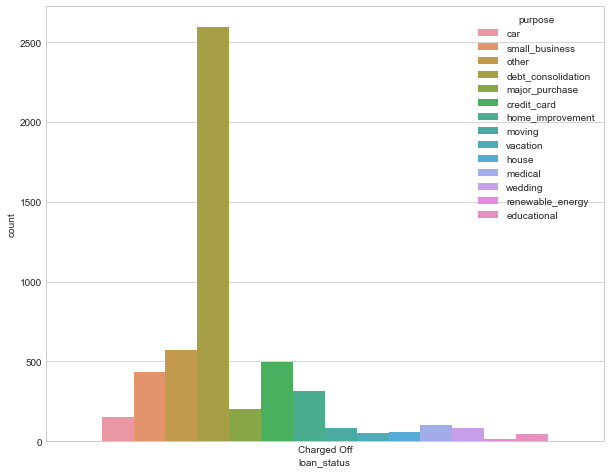

In [24]:
data_CO=df_raw[df_raw['loan_status']=='Charged Off'] #Subsetting the data for charged off cases
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
#To analyse the frequency of various purposes within the subset
sns.countplot(x='loan_status',hue='purpose',data=data_CO)

#### Approximately 2700 cases of Charged Off status arose due Debt Consolidation as the purpose of application

In [25]:
#Calculating the percentage of debt consolidation in the charged off subset
round(100*(len(data_CO[data_CO['purpose']=='debt_consolidation'].index)/len(data_CO.index)),2)

49.88

#### Thus almost half (49.3%) of the defaulters borrowed loan for the purpose of Debt Consolidation

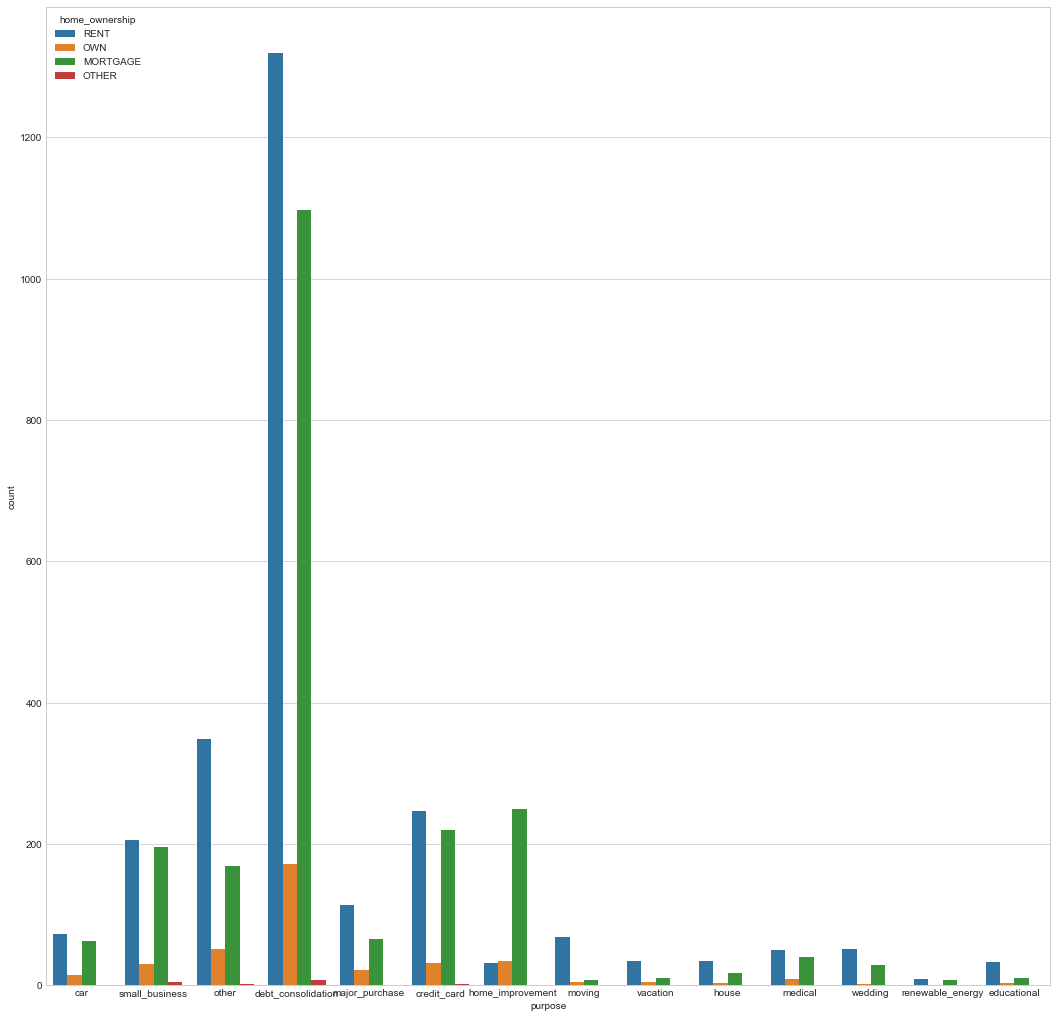

In [26]:
plt.figure(figsize=(18,18))
sns.countplot(x='purpose',hue='home_ownership',data=data_CO)

In [27]:
# Calculating the percentage of people who had borrowed for the purpose of debt consolidation and had defaulted but owned a house 
data_CO_DC=data_CO[data_CO['purpose']=='debt_consolidation']
round(100*(len(data_CO_DC[data_CO_DC['home_ownership']=='OWN'].index)/len(data_CO_DC.index)),2)

6.63

#### Only 6.96% of the defaulters applying for Debt Consolidation owned a house, 93.04% of the defaulters seeking debt consolidation did not own a house.Either Mortgage or Rent,other.

#### Thus People applying for loan for the purpose of debt consolidation and then defaulting had the maximum likelihood of not owning a house

In [28]:
data_FP=df_raw[df_raw['loan_status']=='Fully Paid'] #Subsetting data for fully paid

In [29]:
data_FP_DC=data_FP[data_FP['purpose']=='debt_consolidation']

In [30]:
round(100*(len(data_FP_DC[data_FP_DC['home_ownership']=='OWN'].index)/len(data_FP_DC.index)),2)

6.86

#### Only 7.06% of the defaulters applying for Debt Consolidation owned a house, 92.94% of the Borrowers seeking debt consolidation did not own a house.Either Mortgage or Rent,other.¶ Yet the debt was fully paid

Now our aim is to identify the factors that are imacting the debt consolidation borrowers for both statuses(Charged Off and Fully Paid) which is causing them to either default on their borrowing or Comply on time

#### The countplots are giving a superficial overview of how the variables are behaving as the parts of univariate an bivariate analysis

## Doing Univariate and Bivariate anaysis independently

## a) Univariate :

In [31]:
# Defining a function that gives different plots based on the data type of the variable
# df represents the dataframe,var represents the variables or columns,dtype is either categorical or no
def univar_analis(data,var,dtype,hue=None):
    if dtype ==0: # 0 refers to numerical variables
        
        plt.figure(figsize=(10,8))  
        plt.subplot(121)
        plt.title("Distribution Plot")
        sns.distplot(data[var])
        
        plt.subplot(122)
        plt.title("Box Plot")
        sns.boxplot(data[var])
    
    if dtype ==1: # variable is categorical
        plt.figure(figsize=(10,8))
        plt.title('Count Plot')
        sns.countplot(x=var,data=data,hue=hue)

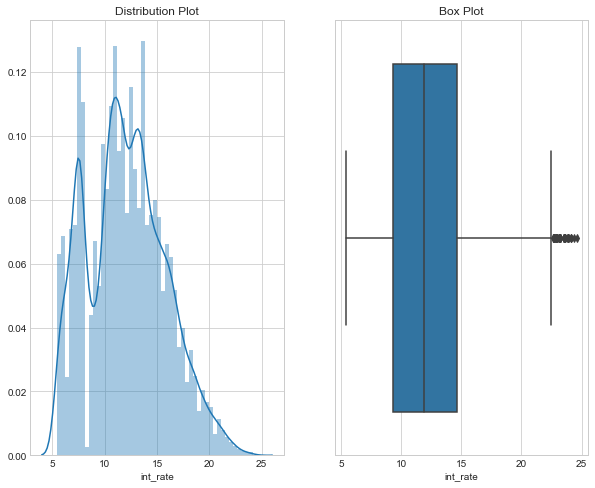

In [32]:
 #analysing interest rates
univar_analis(df_raw,var='int_rate',dtype=0)

Inference : Most of the interest rates are between 9%-15%

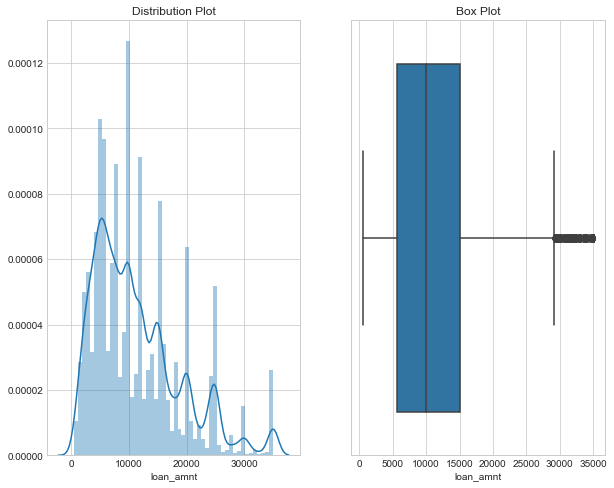

In [33]:
 #analysisng loan amounts
univar_analis(df_raw,var='loan_amnt',dtype=0)

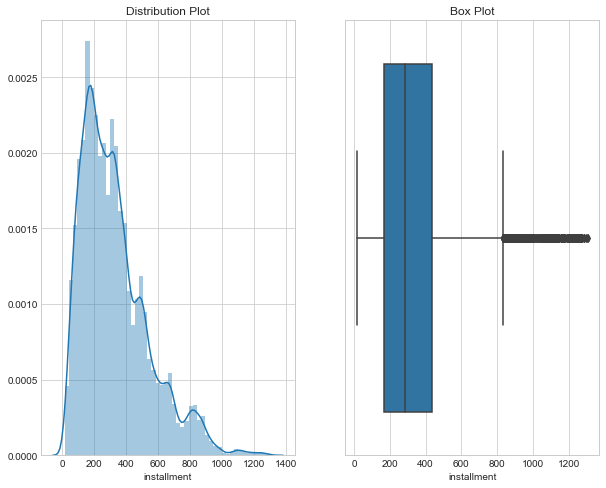

In [34]:
 # analysing installments
univar_analis(df_raw,var='installment',dtype=0)

IQR is 180-430 approx

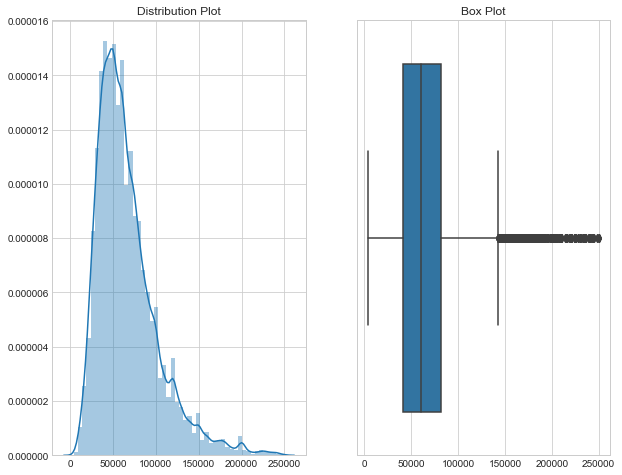

In [35]:
# analysing annual incomes
univar_analis(df_raw[df_raw['annual_inc']<250000],var=['annual_inc'],dtype=0) 

Most applicants are earning less than 100000

### Categorical Variables

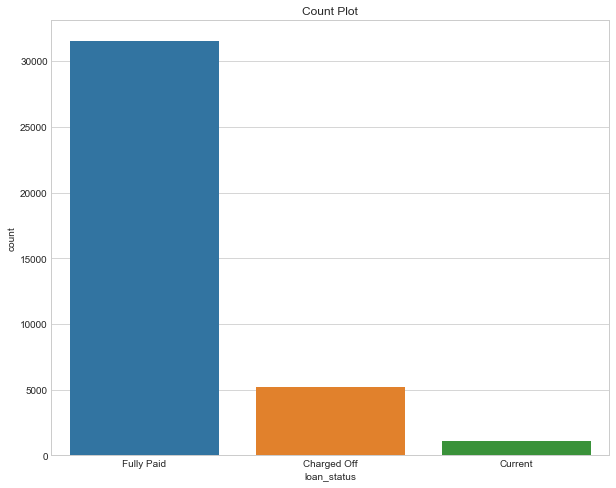

In [36]:
#analysing loan stauses
univar_analis(df_raw,var='loan_status',dtype=1)

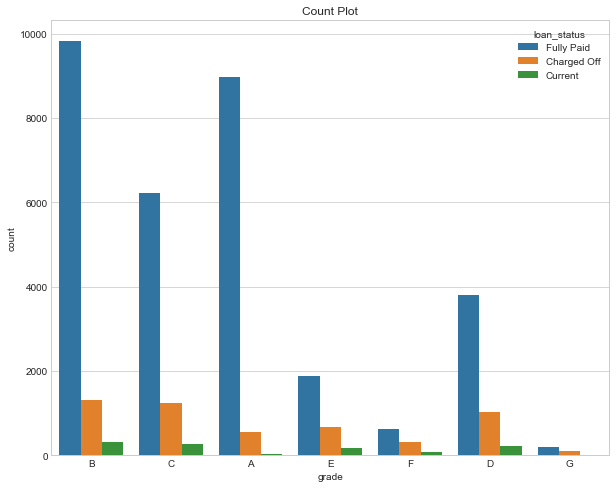

In [37]:
# grades
univar_analis(df_raw,var='grade',dtype=1,hue='loan_status')

Maximum charged off cases are for grade B,C,D loans

### Defining a new parameter for better decision making - 'Probability_of_defaulting'
#### probabilty_of_defaulting = (no. of charged off cases/total number of cases)

## b) Bivariate Analysis

### Based on Purpose of loan

In [38]:
# Creating a pivot table for required plot
bivariate_purpose=df_raw.pivot_table(index='purpose',columns='loan_status',aggfunc='count',dropna=True,fill_value=0)['annual_inc']

In [39]:
# Deriving the probability metric
bivariate_purpose['probability_of_defaulting']=bivariate_purpose['Charged Off']/(bivariate_purpose['Charged Off']+bivariate_purpose['Fully Paid']+bivariate_purpose['Current'])

In [40]:
bivariate_purpose

loan_status,Charged Off,Current,Fully Paid,probability_of_defaulting
purpose,,,,
car,151,49,1278,0.102165
credit_card,499,101,4297,0.101899
debt_consolidation,2595,567,14748,0.144891
educational,47,0,245,0.160959
home_improvement,316,94,2415,0.111858
house,56,14,291,0.155125
major_purchase,201,35,1848,0.096449
medical,99,12,546,0.150685
moving,81,7,460,0.147810


In [41]:
bivariate_purpose.reset_index(inplace=True)

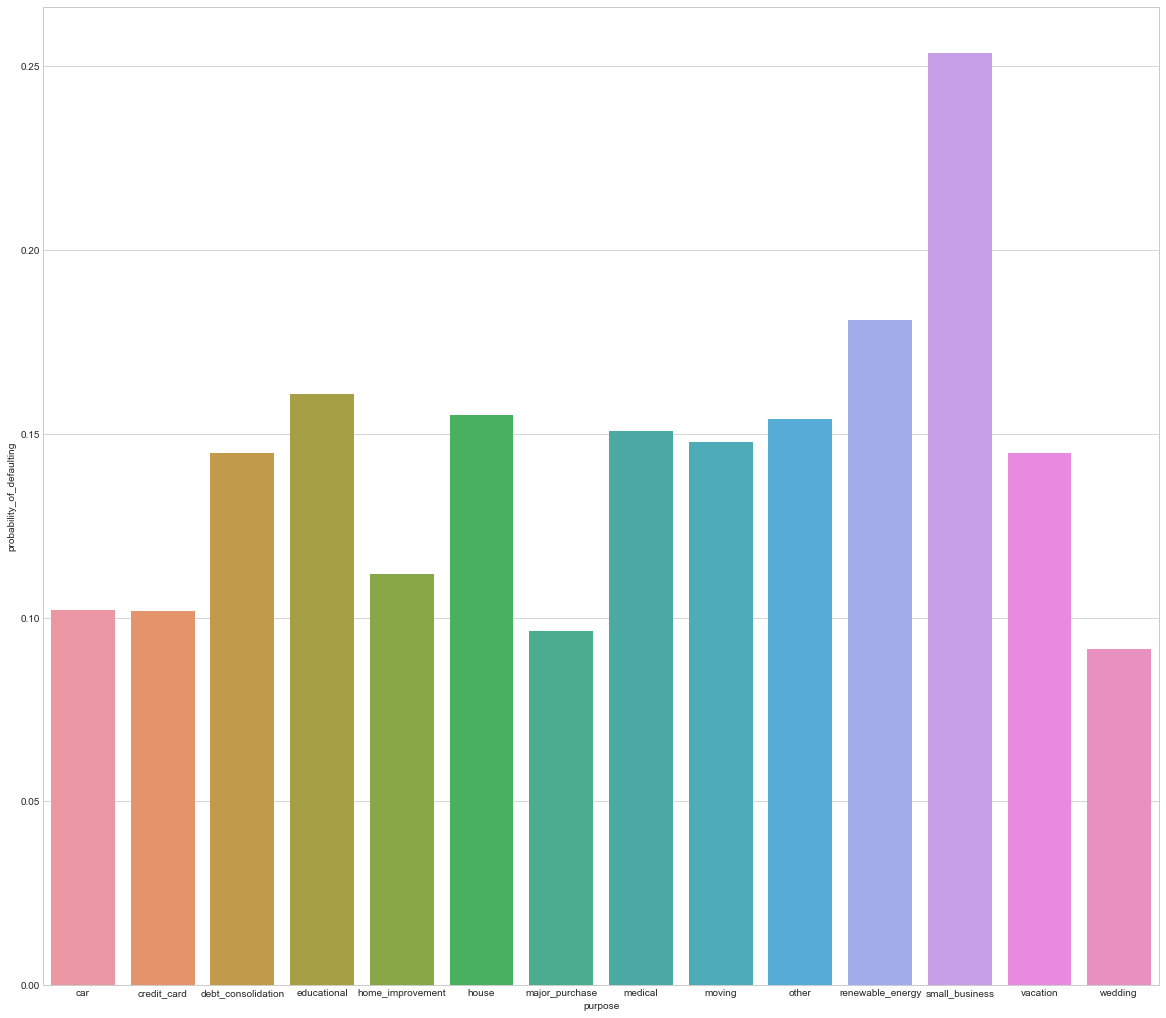

In [42]:
plt.figure(figsize=(20,18))
sns.barplot(x='purpose',y='prx`obability_of_defaulting',data=bivariate_purpose)

#### Inference : Small Businesses have the maximum probability of defaulting

### Based on Grade

In [43]:
bivariate_grade=df_raw.pivot_table(index='grade',columns='loan_status',aggfunc='count',dropna=True,fill_value=0)['annual_inc']

In [44]:
bivariate_grade['probability_of_defaulting']=bivariate_grade['Charged Off']/(bivariate_grade['Charged Off']+bivariate_grade['Fully Paid']+bivariate_grade['Current'])

In [45]:
bivariate_grade.reset_index(inplace=True)

In [46]:
bivariate_grade

loan_status,grade,Charged Off,Current,Fully Paid,probability_of_defaulting
0,A,546,35,8965,0.057197
1,B,1313,327,9820,0.114572
2,C,1229,257,6222,0.159445
3,D,1036,216,3800,0.205067
4,E,678,175,1888,0.247355
5,F,304,71,634,0.301288
6,G,96,17,196,0.310680


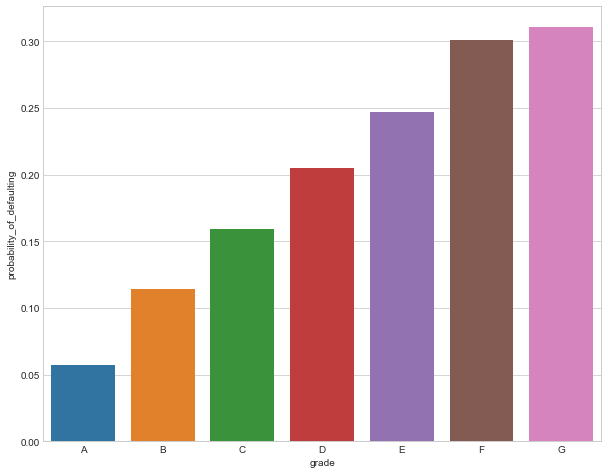

In [47]:
plt.figure(figsize=(10,8))
sns.barplot(x='grade',y='probability_of_defaulting',data=bivariate_grade)

#### Inference : The effect of grade is clearly described by the plot,F and G are most likely to default

### Based on term length

In [48]:
df_raw['term']=df_raw['term'].astype('str')

In [49]:
bivariate_term=df_raw.pivot_table(index='term',columns='loan_status',aggfunc='count',dropna=True,fill_value=0)['annual_inc']

In [50]:
bivariate_term['probability_of_defaulting']=bivariate_term['Charged Off']/(bivariate_term['Charged Off']+bivariate_term['Fully Paid']+bivariate_term['Current'])

In [51]:
bivariate_term.reset_index(inplace=True)

In [52]:
bivariate_term

loan_status,term,Charged Off,Current,Fully Paid,probability_of_defaulting
0,36,2895,0,24596,0.105307
1,60,2307,1098,6929,0.223244


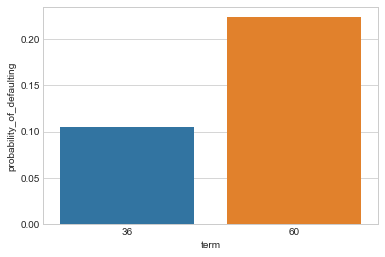

In [53]:
sns.barplot(x='term',y='probability_of_defaulting',data=bivariate_term)

#### Inference : 60 month loans have more probability of defaulting

### Based on Interest rate

In [54]:
# Deriving a new metric, Interest range
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
df_raw['int_rate_range'] = pd.cut(df_raw['int_rate'], bins, labels=slot)

In [55]:
bivariate_interest=df_raw.pivot_table(index='int_rate_range',columns='loan_status',aggfunc='count',dropna=True,fill_value=0)['annual_inc']

In [56]:
bivariate_interest['probability_of_defaulting']=bivariate_interest['Charged Off']/(bivariate_interest['Charged Off']+bivariate_interest['Fully Paid']+bivariate_interest['Current'])

In [57]:
bivariate_interest.reset_index(inplace=True)

In [58]:
bivariate_interest

loan_status,int_rate_range,Charged Off,Current,Fully Paid,probability_of_defaulting
0,10-12.5,229,6,4841,0.045114
1,15 and above,500,64,5967,0.076558
2,12.5-15,1116,254,7753,0.122328
3,7.5-10,1358,252,7205,0.154056
4,NaN,1712,422,5290,0.230603


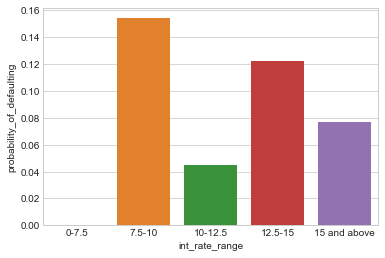

In [59]:
sns.barplot(x='int_rate_range',y='probability_of_defaulting',data=bivariate_interest)

### Based on employment length

In [60]:
bivariate_emp=df_raw.pivot_table(index='emp_length',columns='loan_status',aggfunc='count',dropna=True,fill_value=0)['annual_inc']

In [61]:
bivariate_emp['probability_of_defaulting']=bivariate_emp['Charged Off']/(bivariate_emp['Charged Off']+bivariate_emp['Fully Paid']+bivariate_emp['Current'])

In [62]:
bivariate_emp.reset_index(inplace=True)

In [63]:
bivariate_emp

loan_status,emp_length,Charged Off,Current,Fully Paid,probability_of_defaulting
0,1 year,429,71,2632,0.136973
1,10+ years,1293,391,7065,0.147788
2,2 years,549,97,3647,0.127883
3,3 years,542,83,3398,0.134725
4,4 years,441,94,2840,0.130667
5,5 years,443,88,2702,0.137024
6,6 years,298,61,1833,0.135949
7,7 years,257,62,1427,0.147194
8,8 years,196,44,1209,0.135266
9,9 years,153,32,1052,0.123686


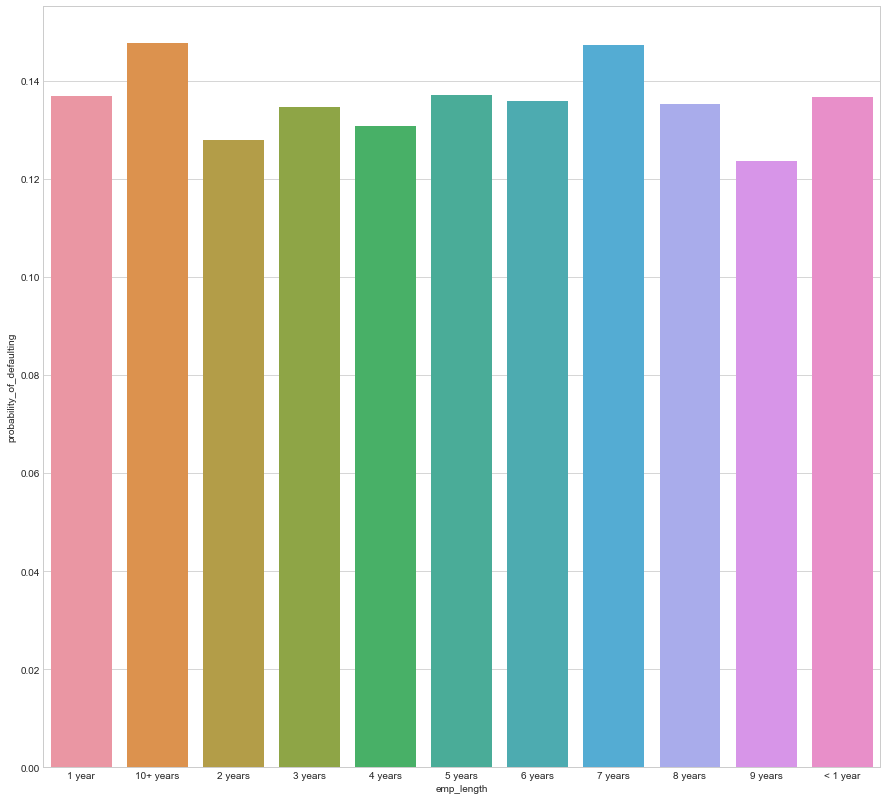

In [64]:
plt.figure(figsize=(15,14))
sns.barplot(x='emp_length',y='probability_of_defaulting',data=bivariate_emp)

### Based on delinquency

In [65]:
df_raw['delinq_2yrs']=df_raw['delinq_2yrs'].astype('str')

In [66]:
bivariate_del=df_raw.pivot_table(index='delinq_2yrs',columns='loan_status',aggfunc='count',dropna=True,fill_value=0)['annual_inc']

In [67]:
bivariate_del['probability_of_defaulting']=bivariate_del['Charged Off']/(bivariate_del['Charged Off']+bivariate_del['Fully Paid']+bivariate_del['Current'])

In [68]:
bivariate_del.reset_index(inplace=True)

In [69]:
bivariate_del

loan_status,delinq_2yrs,Charged Off,Current,Fully Paid,probability_of_defaulting
0,0,4574,981,28173,0.135614
1,1,465,93,2591,0.147666
2,11,0,0,1,0.000000
3,2,119,14,514,0.183926
4,3,26,8,171,0.126829
5,4,12,2,43,0.210526
6,5,3,0,18,0.142857
7,6,1,0,9,0.100000
8,7,1,0,3,0.250000
9,8,1,0,1,0.500000


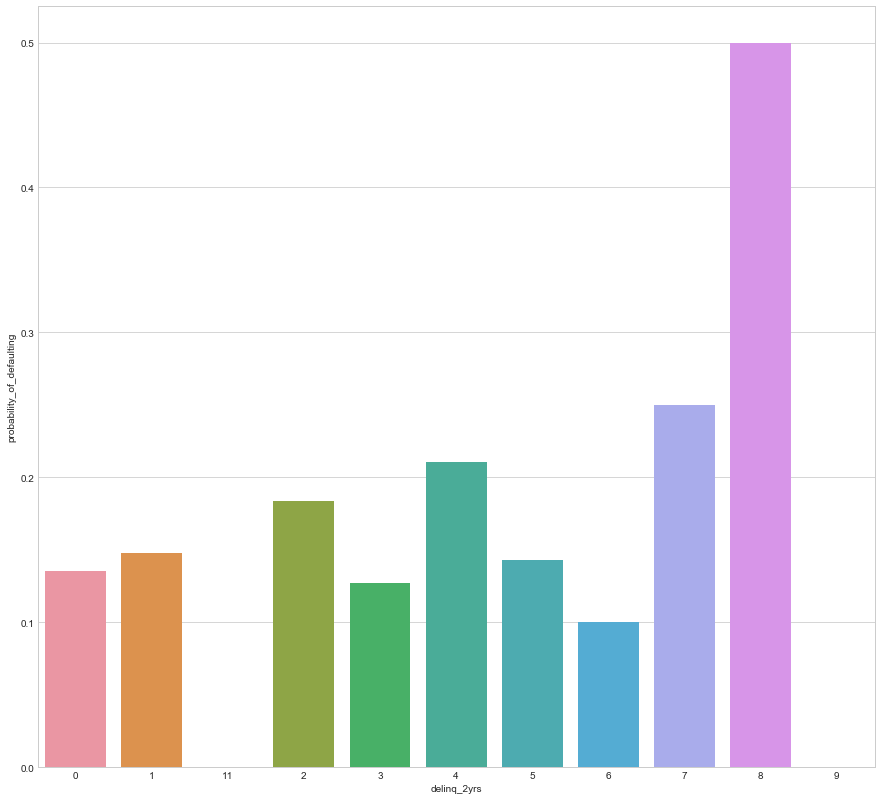

In [70]:
plt.figure(figsize=(15,14))
sns.barplot(x='delinq_2yrs',y='probability_of_defaulting',data=bivariate_del)

#### 8 delinquencies in last 2 years proved to be most likely to default

## Conclusion
### Most important variables to consider while predicting the status of loans are :
#### 1. Purpose
#### 2. Grade
#### 3. Term
#### 4. Delinquecies in last 2 years